<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Mini-Batch Gradient Descent</h1>

<h2>Objective</h2><ul><li> How to use Mini-Batch Gradient Descent to train model.</li></ul> 


<h2>Table of Contents</h2>
<p>In this Lab, you will practice training a model by using Mini-Batch Gradient Descent.</p>

<ul>
    <li><a href="#Make-Some-Data">Make Some Data</a></li>
    <li><a href="#Create-the-Model-and-Cost-Function-(Total-Loss)">Create the Model and Cost Function (Total Loss)</a></li>
    <li><a href="#Train-the-Model:-Batch-Gradient-Descent">Train the Model: Batch Gradient Descent</a></li>
    <li><a href="#Train-the-Model:-Stochastic-Gradient-Descent-with-Dataset-DataLoader">Train the Model: Stochastic Gradient Descent with Dataset DataLoader</a></li>
    <li><a href="#Train-the-Model:-Mini-Batch-Gradient-Descent:-Batch-Size-Equals-5">Train the Model: Mini Batch Gradient Descent: Batch Size Equals 5</a></li>
    <li><a href="#Train-the-Model:-Mini-Batch-Gradient-Descent:-Batch-Size-Equals-10">Train the Model: Mini Batch Gradient Descent: Batch Size Equals 10</a></li>
</ul>

<h2>Preparation</h2>


We'll need the following libraries:


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch. 


In [93]:
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()

        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1

        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0

        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data Space Iteration: '+ str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<!-- <h2 id="Makeup_Data">Make Some Data </h2>
 -->
 ## Make Some Data


Import PyTorch and set random seed:


In [94]:
import torch
torch.manual_seed(1)

Generate values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate. Add some noise to the data:


In [95]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

Plot the results:


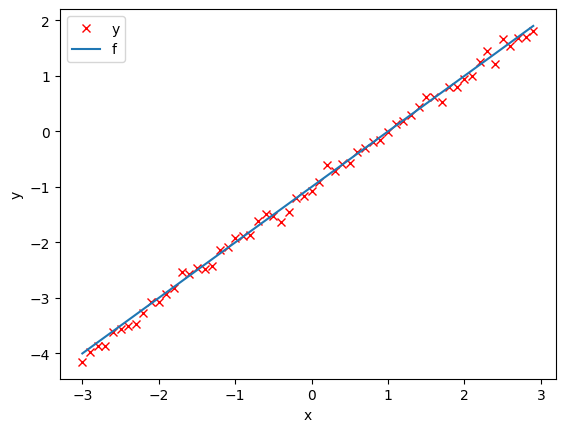

In [96]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!-- <h2 id="Model_Cost">Create the Model and Cost Function (Total Loss) </h2>
 -->
 ## Create the Model and Cost Function (Total Loss)


Define the <code>forward</code> function: 


In [97]:
def forward(x):
    return w * x + b

Define the cost or criterion function: 


In [98]:
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


<Figure size 640x480 with 0 Axes>

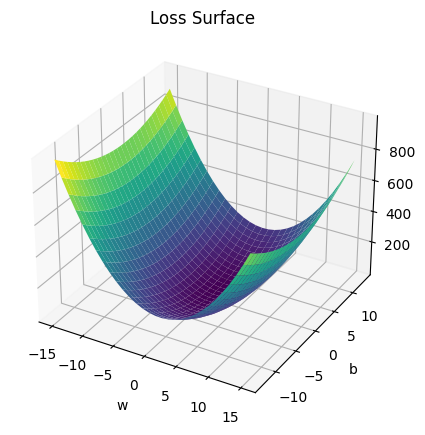

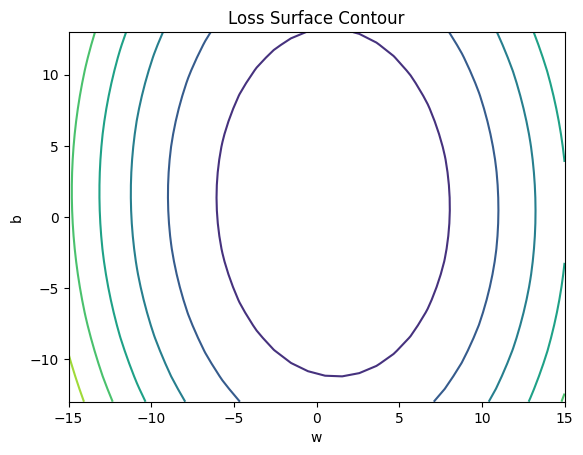

In [99]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30)

<!-- <h2>Train the Model: Batch Gradient Descent (BGD)</h2>
 -->
 ## Train the Model: Batch Gradient Descent


Define <code>train_model_BGD</code> function.


In [100]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.1
LOSS_BGD = []

def train_model_BGD(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        LOSS_BGD.append(loss)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

Run 10 epochs of batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


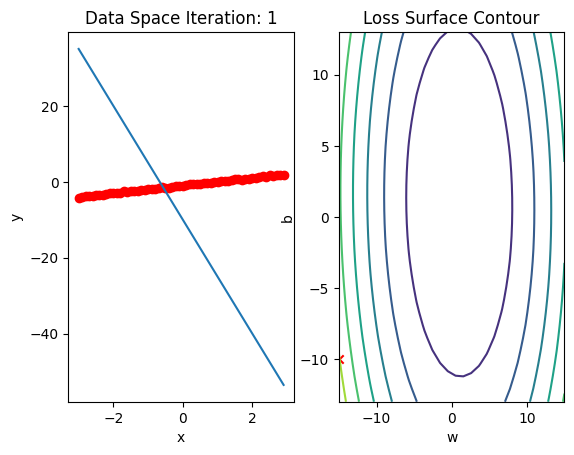

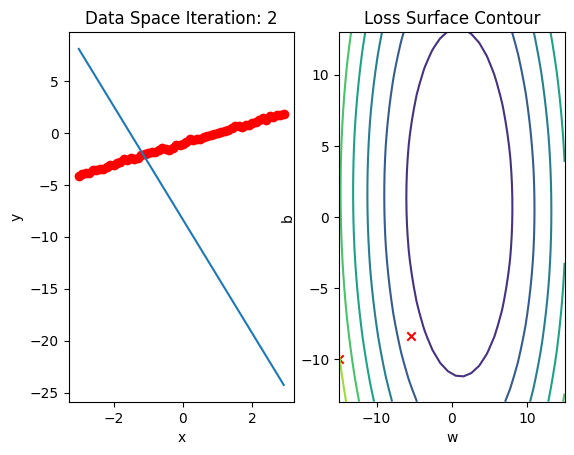

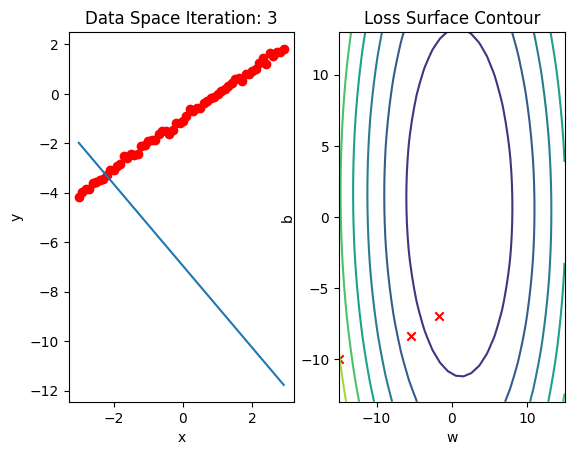

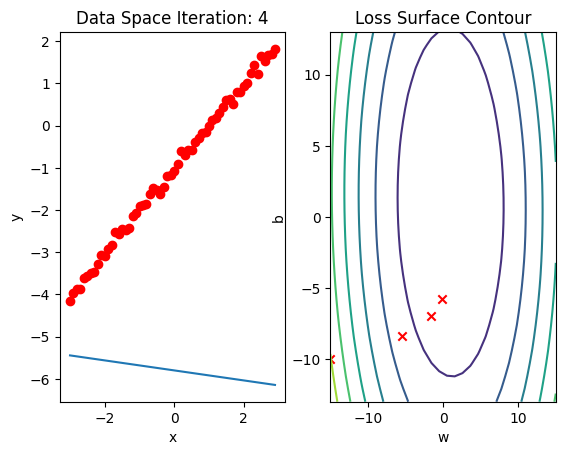

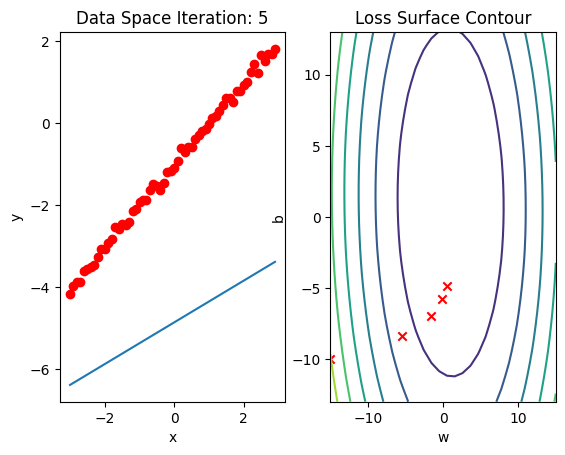

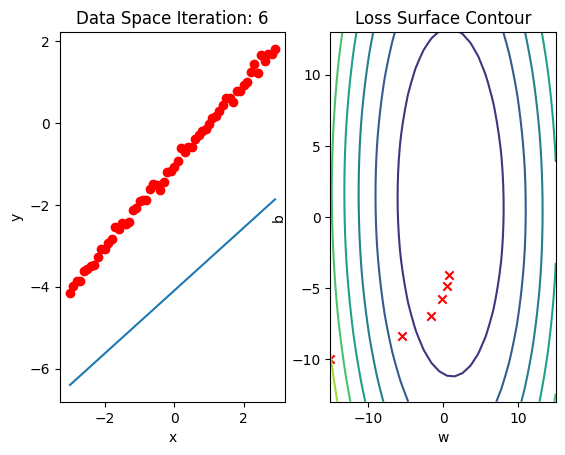

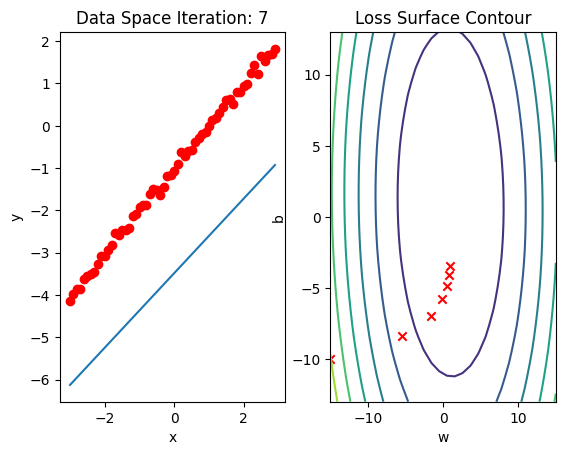

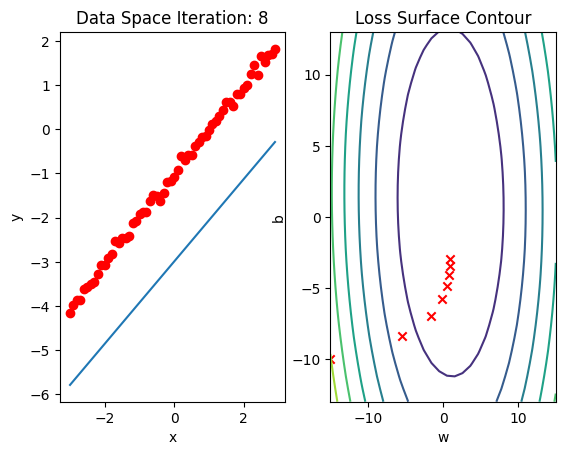

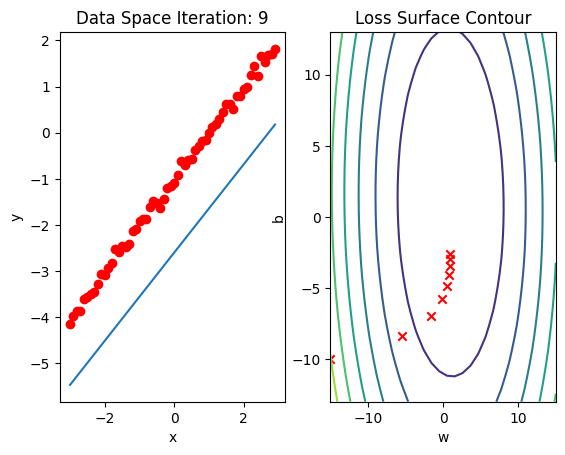

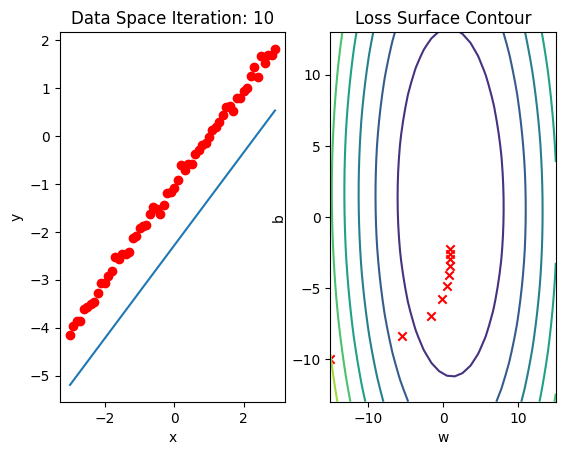

In [101]:
train_model_BGD(10)

<!-- <h2 id="SGD"> Stochastic Gradient Descent (SGD) with Dataset DataLoader</h2>
 -->
 ## Train the Model: Stochastic Gradient Descent with Dataset DataLoader


Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [102]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Import <code>Dataset</code> and <code>DataLoader</code> libraries


In [103]:
from torch.utils.data import Dataset, DataLoader

Create <code>Data</code> class


In [104]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * X - 1
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

Create a dataset object and a dataloader object: 


In [105]:
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=1)

Define <code>train_model_SGD</code> function for training the model.


In [106]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_SGD = []
lr = 0.1

def train_model_SGD(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_SGD.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()

Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


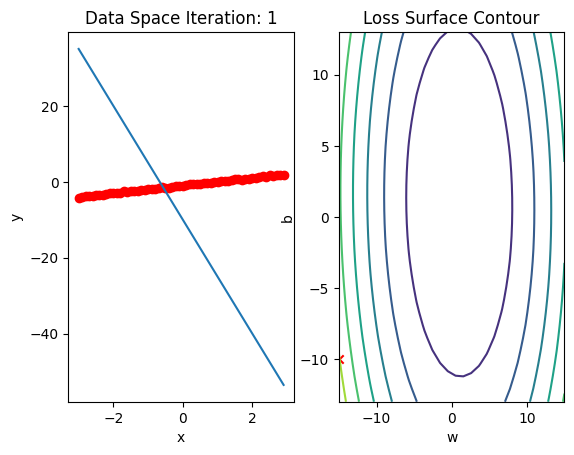

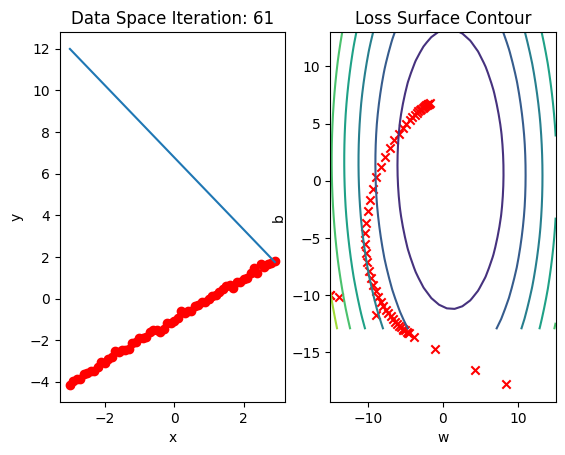

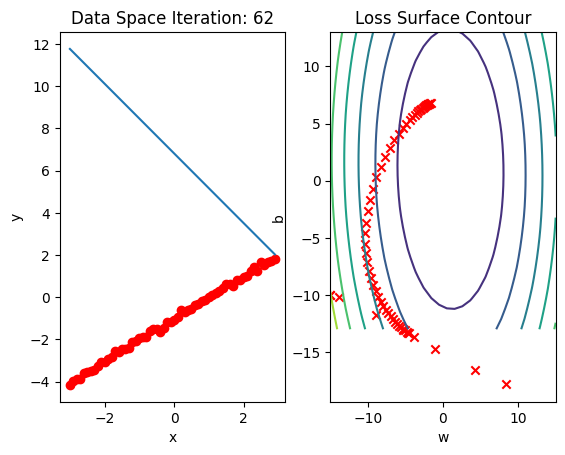

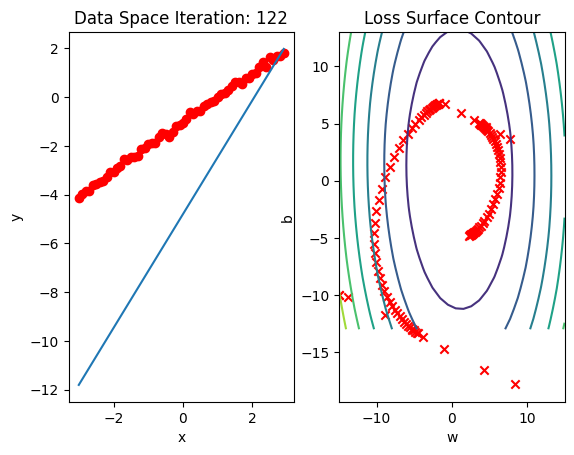

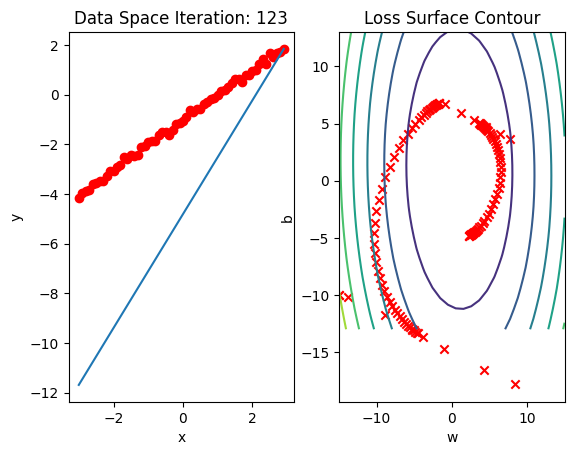

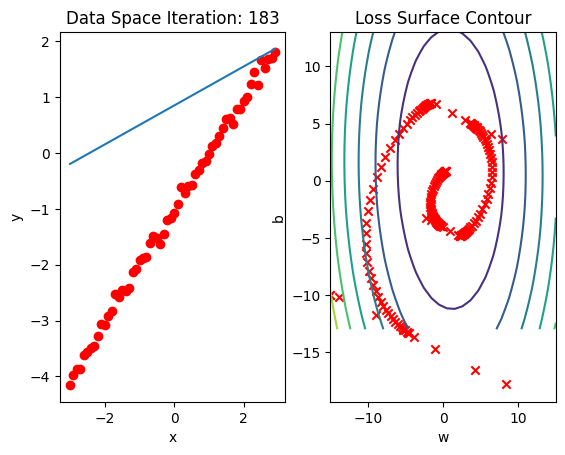

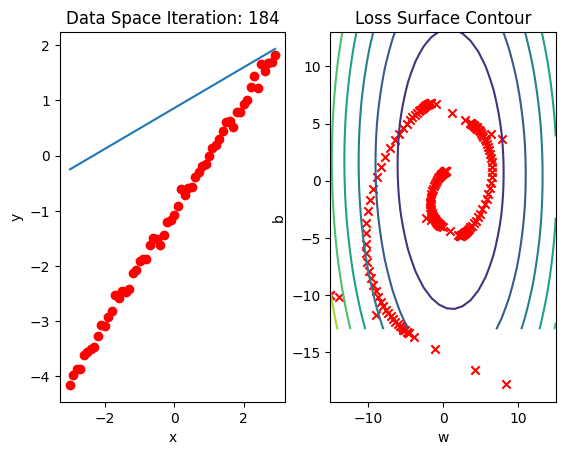

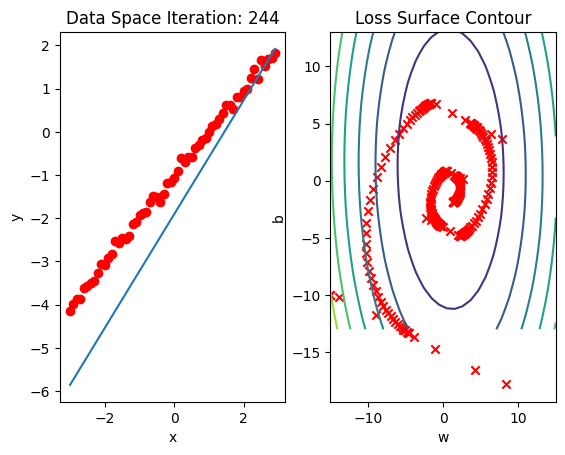

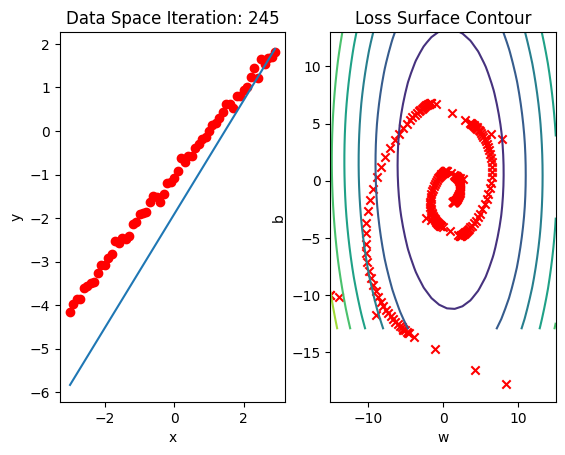

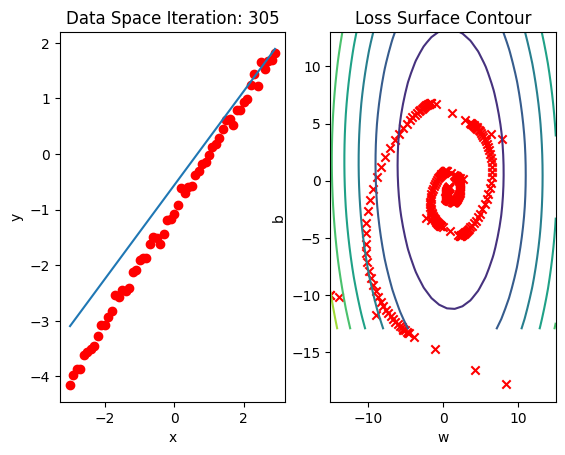

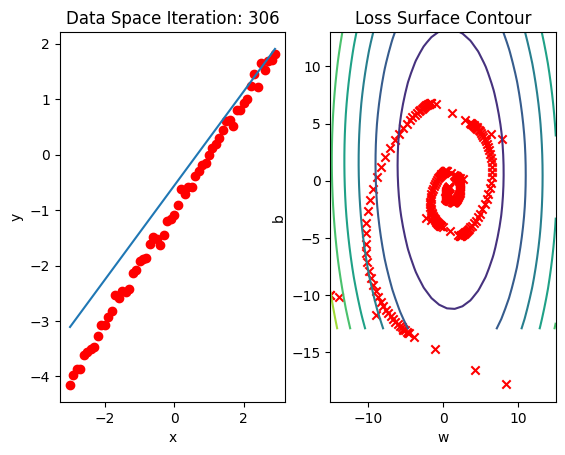

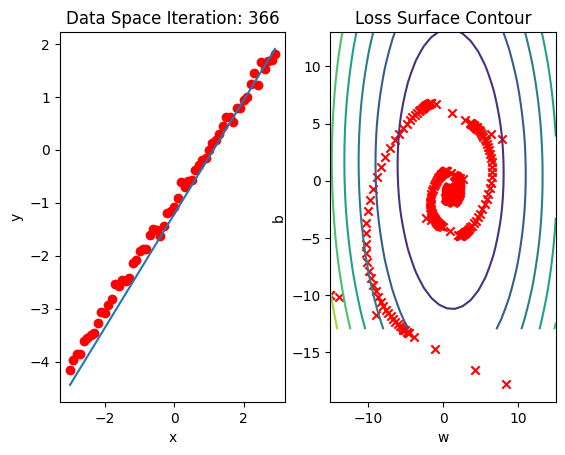

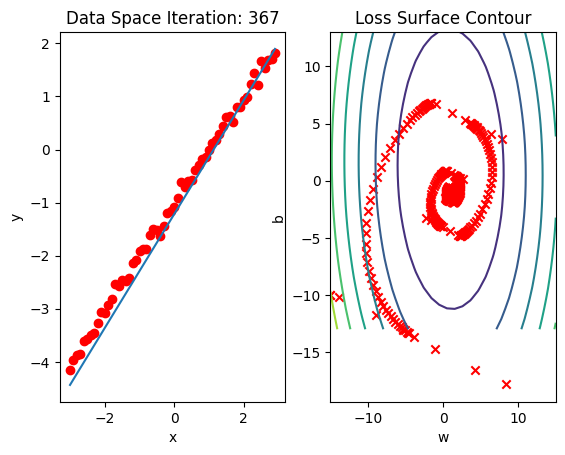

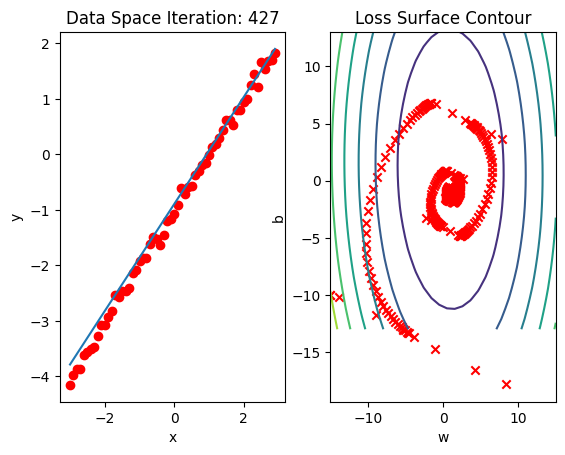

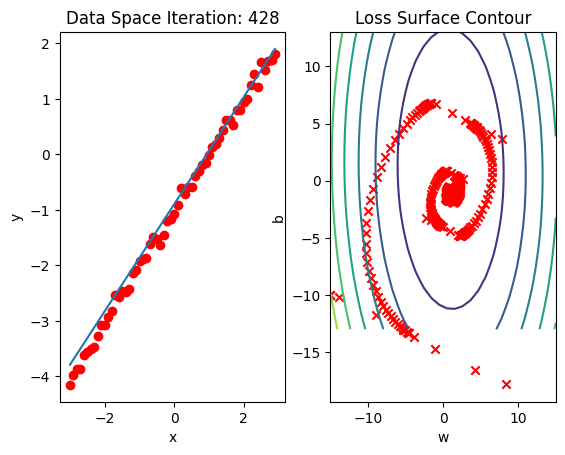

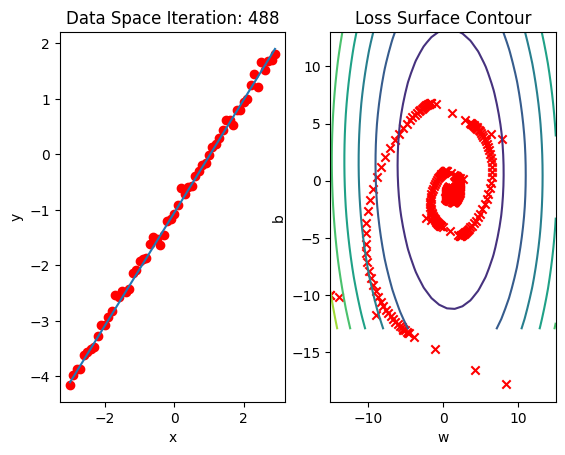

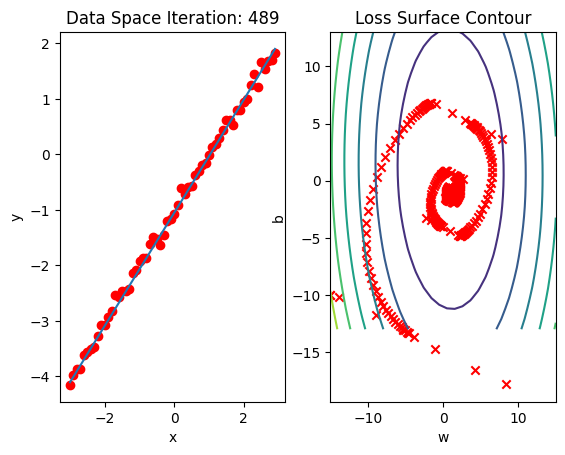

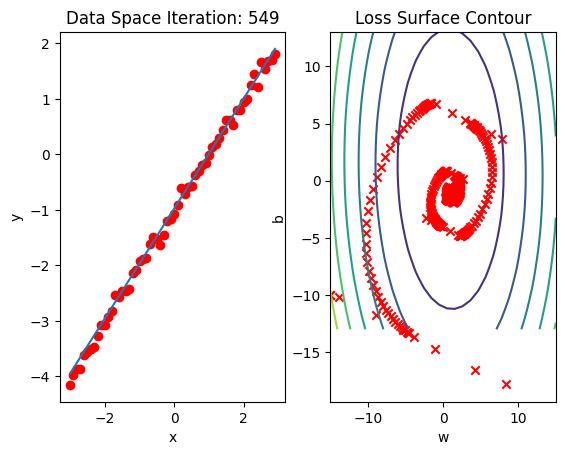

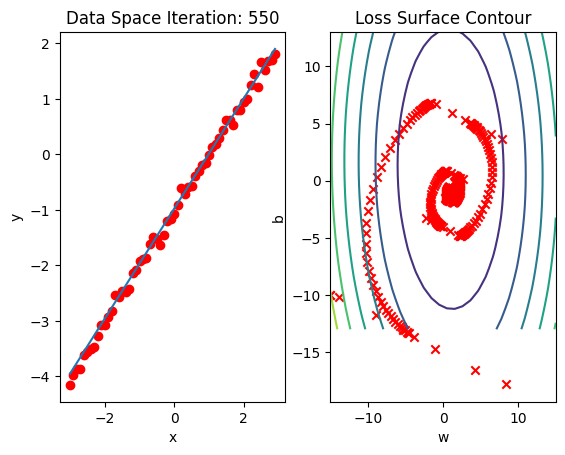

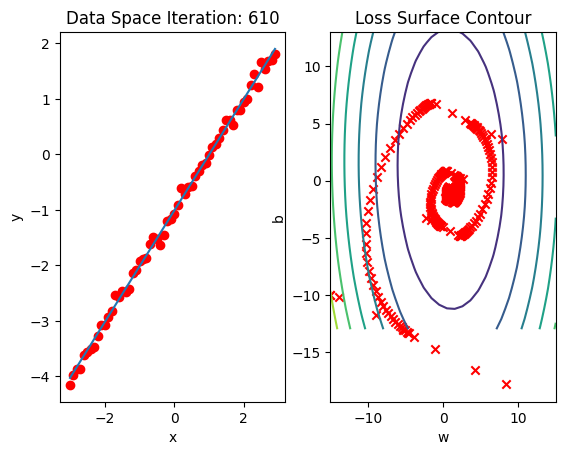

In [107]:
train_model_SGD(10)

<!-- <h2 id="Mini5">Mini Batch Gradient Descent: Batch Size Equals 5</h2> 
 -->
 ## Train the Model: Mini Batch Gradient Descent: Batch Size Equals 5


Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [108]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Create <code>Data</code> object and create a <code>Dataloader</code> object where the batch size equals 5:


In [109]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size=5)

Define <code>train_model_Mini5</code> function to train the model.


In [110]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI5 = []
lr = 0.1

def train_model_Mini5(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI5.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

Run 10 epochs of mini-batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


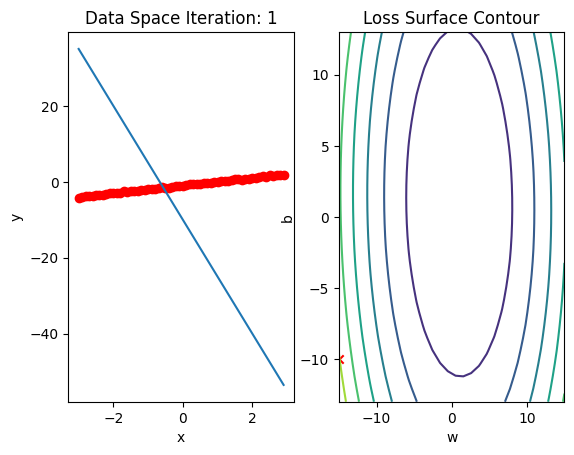

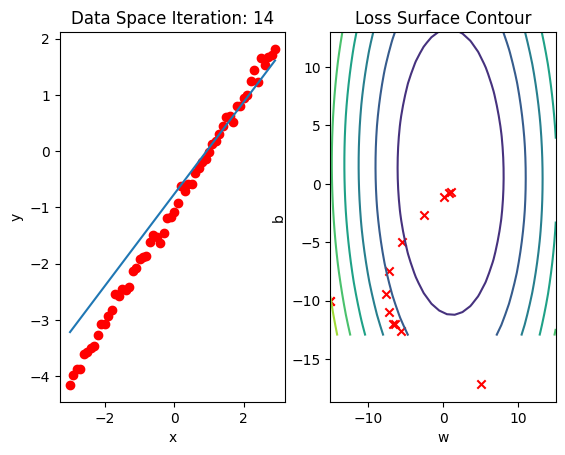

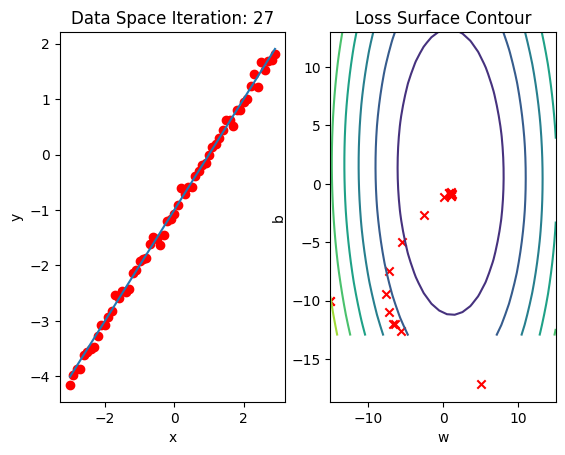

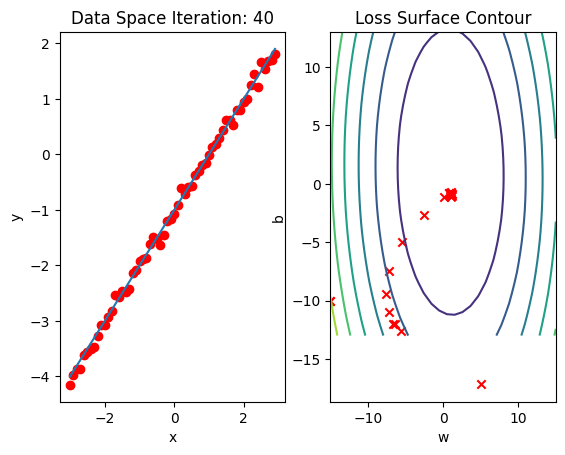

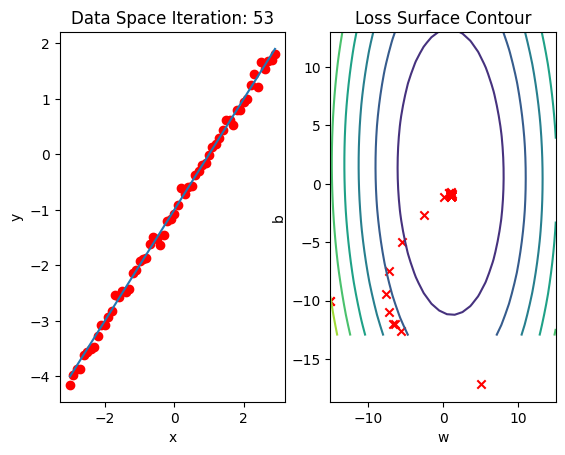

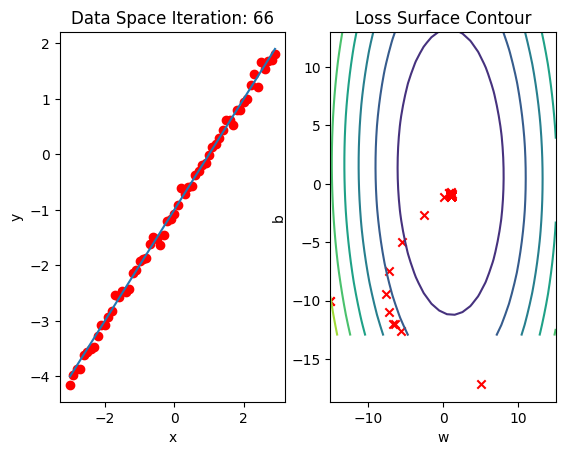

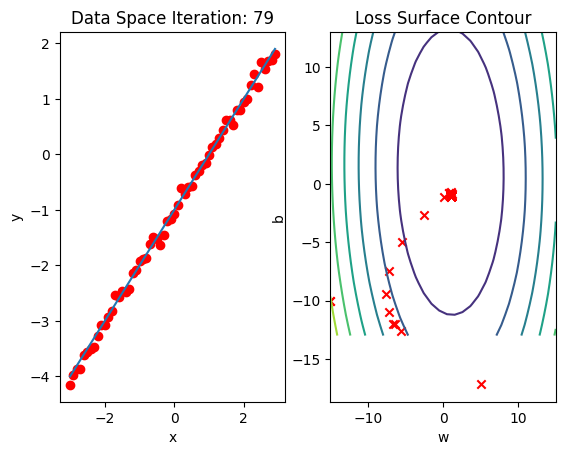

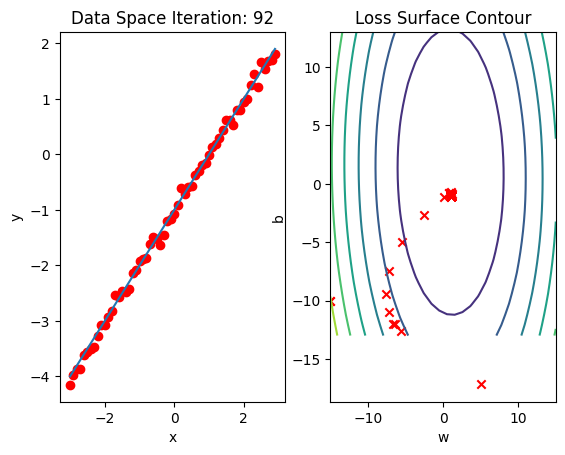

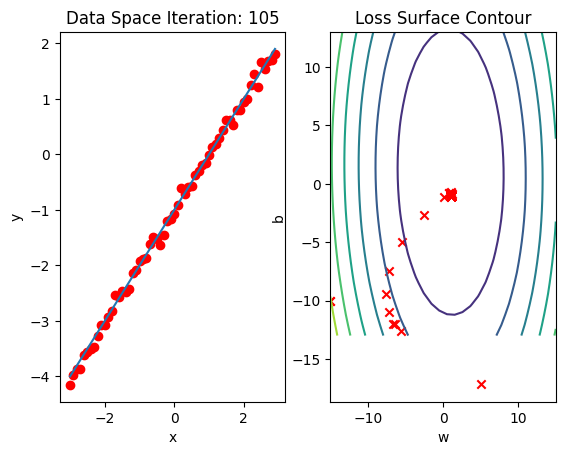

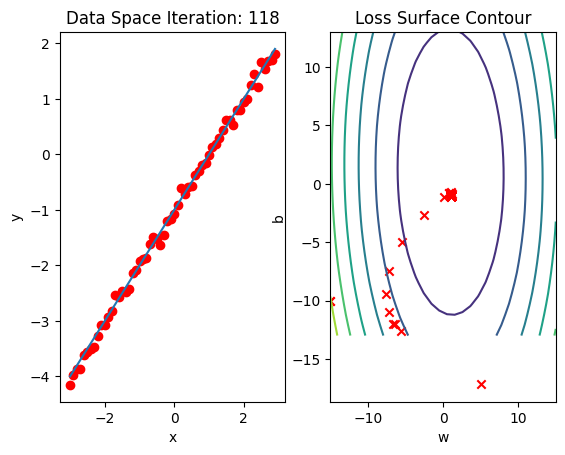

In [111]:
train_model_Mini5(10)

<!-- <h2 id="Mini10">Mini Batch Gradient Descent: Batch Size Equals 10</h2> 
 -->
 ## Train the Model: Mini Batch Gradient Descent: Batch Size Equals 10


Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [112]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Create <code>Data</code> object and create a <code>Dataloader</code> object batch size equals 10


In [113]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size=10)

Define <code>train_model_Mini10</code> function for training the model.


In [114]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI10 = []
lr = 0.1

def train_model_Mini10(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI10.append(criterion(forward(X),Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

Run 10 epochs of mini-batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


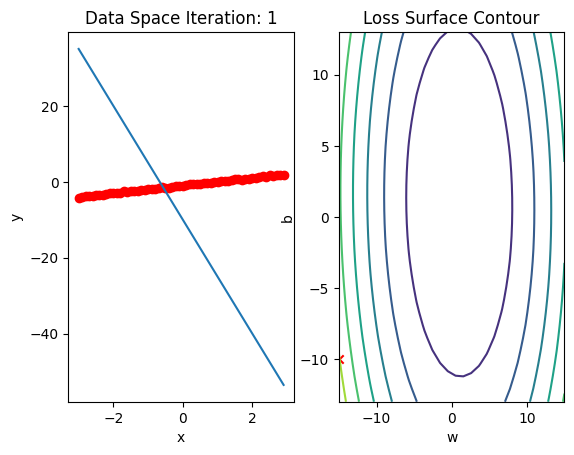

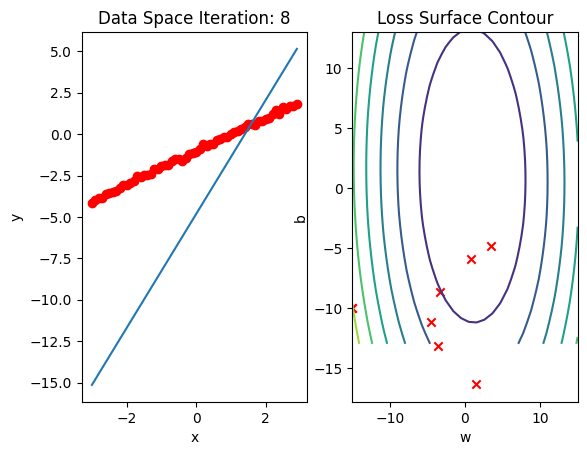

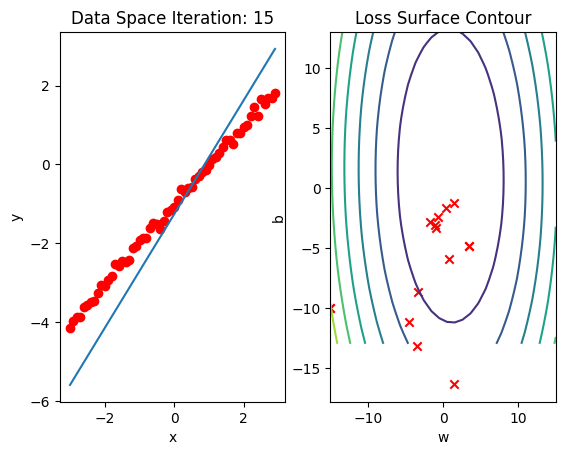

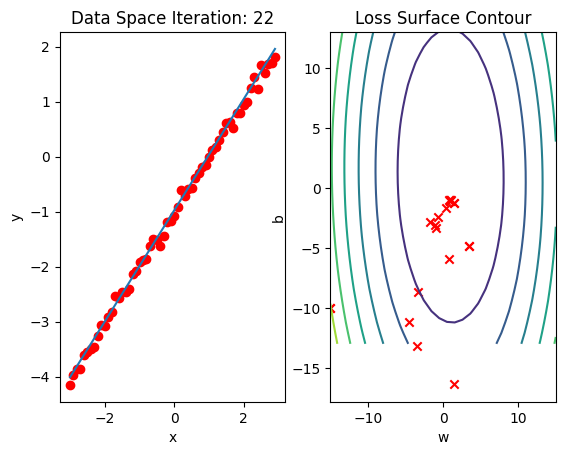

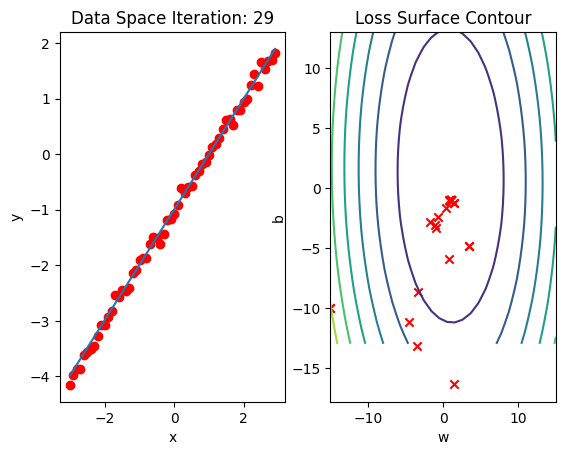

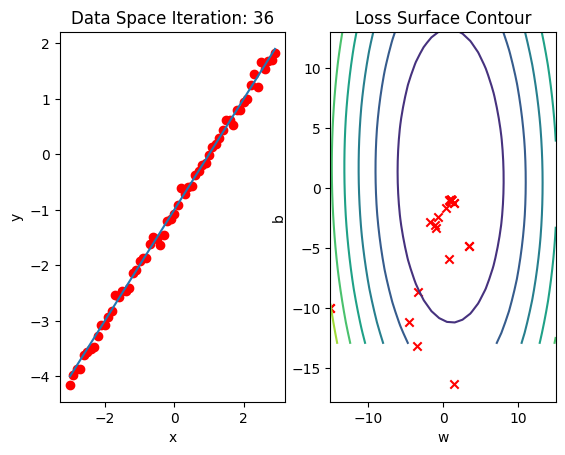

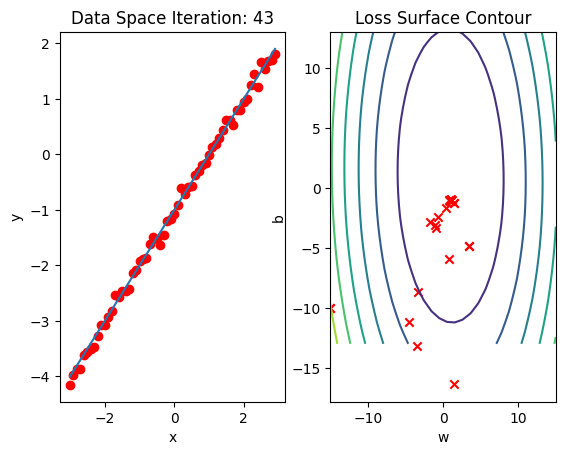

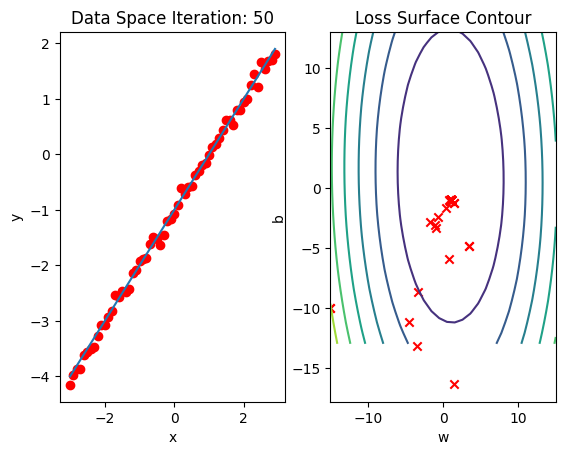

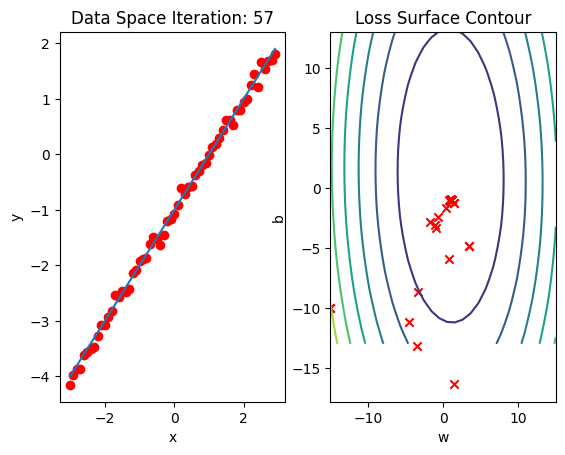

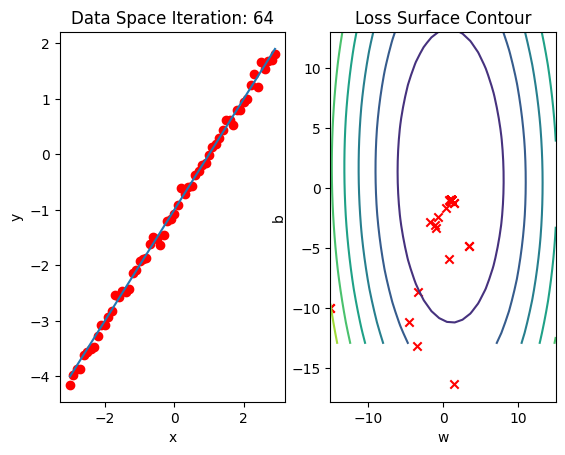

In [115]:
train_model_Mini10(10)

<h3>Practice</h3>


Perform mini batch gradient descent with a batch size of 20. Store the total loss for each epoch in the list LOSS20.  


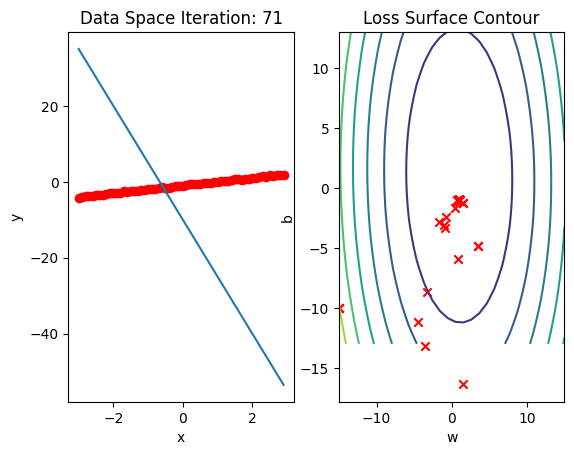

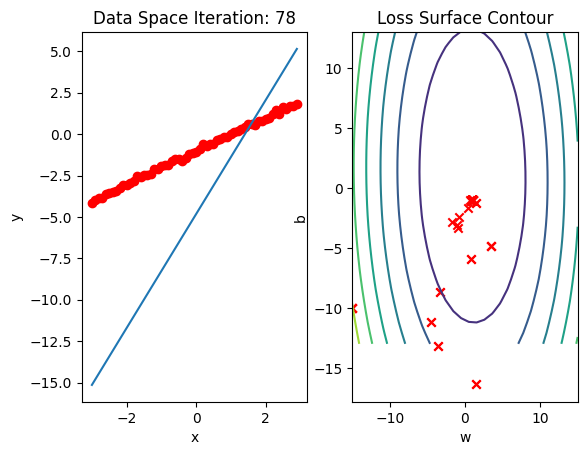

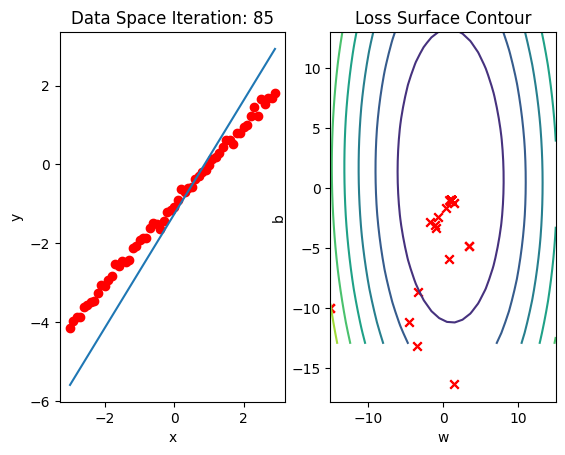

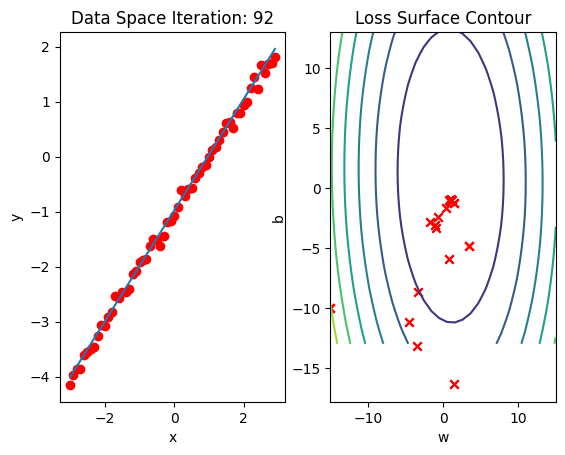

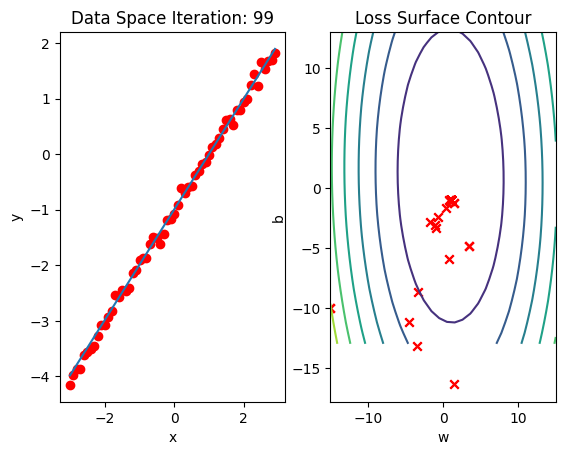

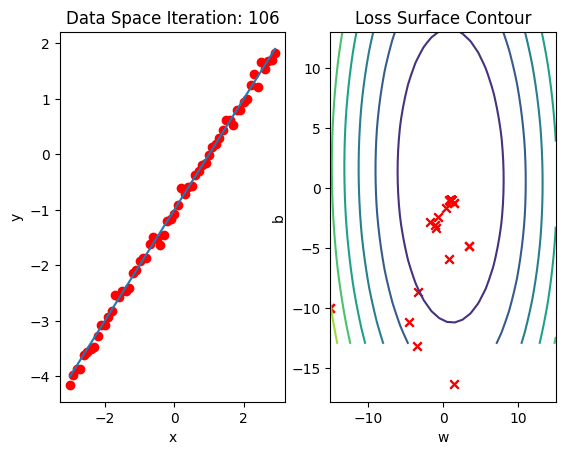

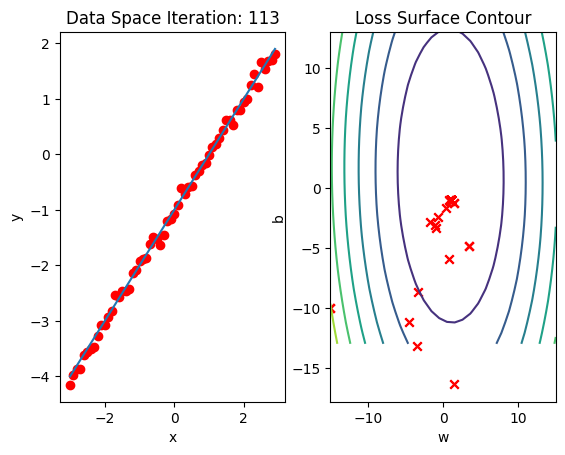

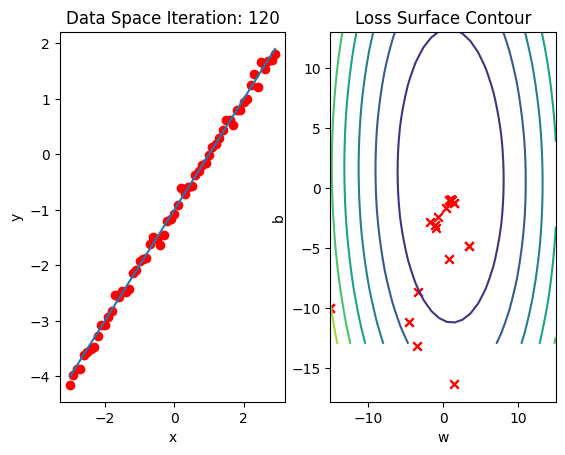

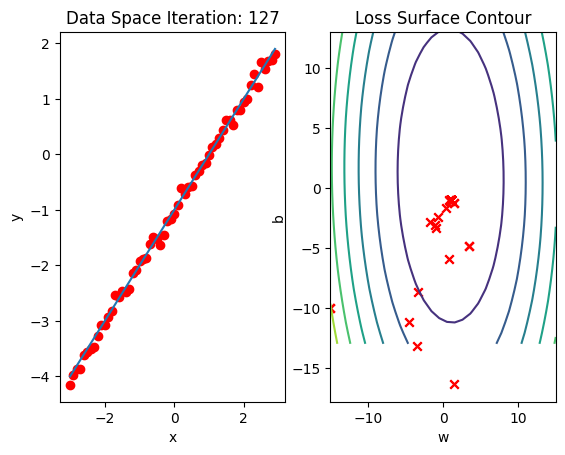

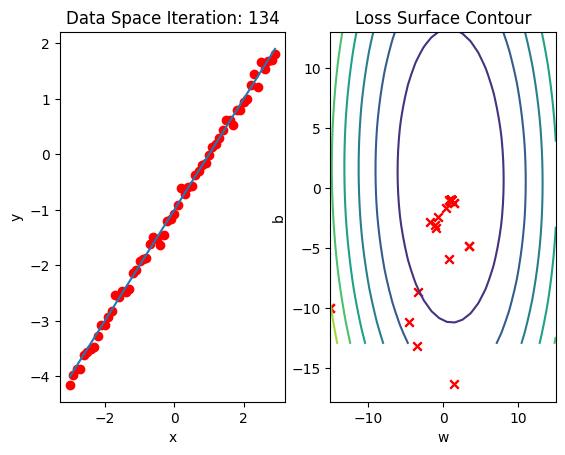

In [116]:
dataset = Data()
DataLoader(dataset=dataset, batch_size=20)

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI20 = []
lr = 0.1

def train_model_Mini20(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI20.append(criterion(forward(X),Y).tolist())
        
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

train_model_Mini20(10)

Plot a graph that shows the LOSS results for all the methods.


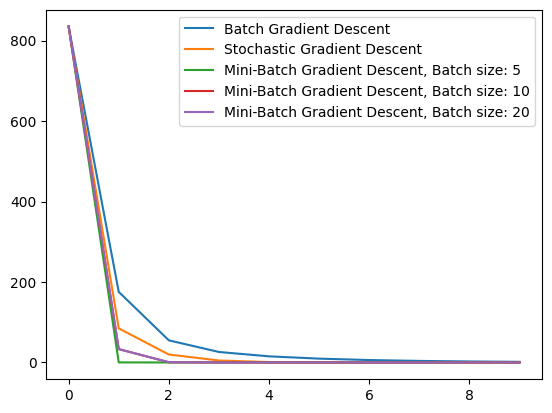

In [117]:
LOSS_BGD = [loss.detach().numpy() for loss in LOSS_BGD]
plt.plot(LOSS_BGD, label = "Batch Gradient Descent")
plt.plot(LOSS_SGD, label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5, label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.plot(LOSS_MINI10, label = "Mini-Batch Gradient Descent, Batch size: 10")
plt.plot(LOSS_MINI20, label = "Mini-Batch Gradient Descent, Batch size: 20")
plt.legend()